# Financial Data Analysis (JP Morgan)

This Jupyter notebook presents a comprehensive analysis of financial data, focusing on historical stock prices. Our primary goals in this project are:

1. **Data Loading and Exploration:** We begin by loading the financial dataset and exploring its characteristics. This step sets the foundation for our analysis.

2. **Time Series Decomposition:** We decompose the time series data into its key components, including trend, seasonality, and residuals, to uncover underlying patterns.

3. **Volatility Analysis using GARCH Models:** To assess and manage risk, we employ GARCH (Generalized Autoregressive Conditional Heteroskedasticity) models to estimate and forecast volatility.

4. **Advanced Visualizations:** Advanced data visualizations provide deeper insights into the financial data, making it easier to understand and interpret.

5. **Risk Assessment and Portfolio Management:** We perform risk assessment by calculating the Value at Risk (VaR) and optimize the asset allocation within the portfolio to achieve the best risk-return trade-off.

Please follow along with the code and explanations to gain insights into financial data analysis and risk management, which are crucial skills for quantitative analysts.


# 1: Data Loading and Exploration
   - Load historical financial data for analysis.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Replace 'your_data_file.csv' with the actual file path of your dataset
data = pd.read_csv(r'C:\Users\abc\Desktop\Portfolio\dataset\JPMorgan Chase.csv')

# Display the first few rows of the dataset to verify the data loading
print(data.head())


       Date       Open       High        Low      Close  Adj Close    Volume
0  1/3/2000  49.833332  50.250000  48.083332  48.583332  24.406227  12019200
1  1/4/2000  47.083332  47.458332  46.125000  47.250000  23.870712  11723400
2  1/5/2000  46.833332  48.375000  46.000000  46.958332  23.723372   8714550
3  1/6/2000  46.750000  48.625000  46.500000  47.625000  24.060173   8369250
4  1/7/2000  48.416668  49.000000  47.333332  48.500000  24.502220   6571950


# 1.1: Checking for Missing Values

In [3]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# 1.2: Basic Statistics and Distributions

Summary statistics for numerical columns and create a histogram to visualize the distribution of the 'Close' prices.

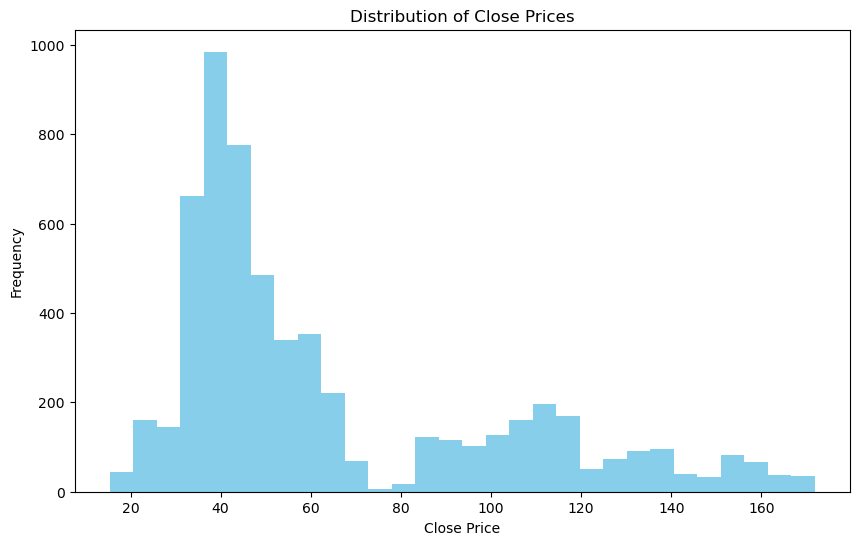

In [4]:
# Display basic statistics of numerical columns
summary_statistics = data.describe()

# Visualize the distribution of the 'Close' prices
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=30, color='skyblue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


# 2: Time Series Decomposition

 Decompose the time series data into its components, including trend, seasonality, and residuals.

 3.1: Convert the 'Date' Column to DateTime

In [5]:
# Convert the 'Date' column to a DateTime data type
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index of the DataFrame
data.set_index('Date', inplace=True)


3.2: Decompose the Time Series

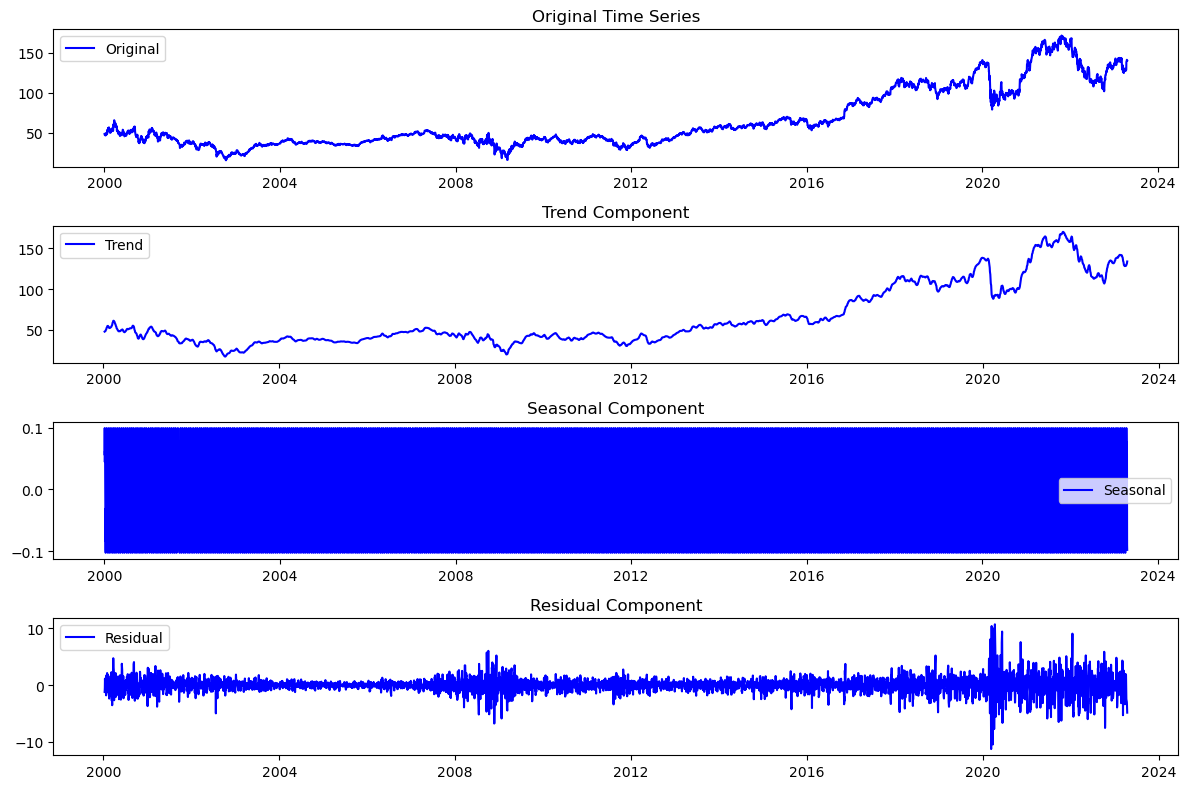

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonality, and residuals
decomposition = seasonal_decompose(data['Close'], model='additive', period=12)

# Plot the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original', color='blue')
plt.legend(loc='best')
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='best')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(residual, label='Residual', color='blue')
plt.legend(loc='best')
plt.title('Residual Component')
plt.tight_layout()
plt.show()

# 3: Volatility Analysis using GARCH Models

In this step, we'll focus on analyzing and modeling the volatility of the time series data. We'll use the arch library to implement a GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model.

In [7]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [8]:
from arch import arch_model

# Specify the GARCH(1,1) model
model = arch_model(data['Close'], vol='Garch', p=1, q=1)

# Fit the GARCH model
results = model.fit()

# Display model summary
print(results.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 4386862.368137823
Iteration:      2,   Func. Count:     12,   Neg. LLF: 40206.19196368178
Iteration:      3,   Func. Count:     20,   Neg. LLF: 52181.48086807634
Iteration:      4,   Func. Count:     26,   Neg. LLF: 39478.59552489275
Iteration:      5,   Func. Count:     32,   Neg. LLF: 30666.825804450476
Iteration:      6,   Func. Count:     38,   Neg. LLF: 23661.201908739604
Iteration:      7,   Func. Count:     43,   Neg. LLF: 23946.80362033013
Iteration:      8,   Func. Count:     57,   Neg. LLF: 22958.402414478292
Iteration:      9,   Func. Count:     62,   Neg. LLF: 27200.606589878476
Iteration:     10,   Func. Count:     70,   Neg. LLF: 22927.984405424373
Iteration:     11,   Func. Count:     75,   Neg. LLF: 22917.589607921225
Iteration:     12,   Func. Count:     80,   Neg. LLF: 22915.13141014945
Iteration:     13,   Func. Count:     85,   Neg. LLF: 22914.48939251896
Iteration:     14,   Func. Count:     90,   Neg. LLF: 2291

The next step is to visualize and interpret the results of the estimated GARCH(1,1) model. Visualizing the model's performance can help us gain insights into the volatility patterns in our financial data.

In [9]:
# Before visualizing there is one thing i need to take care of

data_reset = data.reset_index()
data.reset_index(inplace=True)


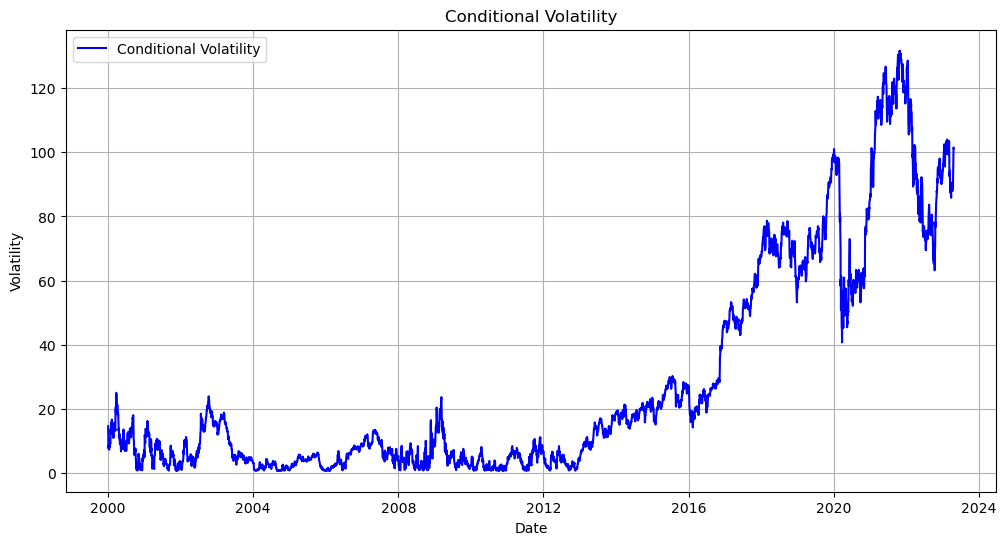

In [10]:
import matplotlib.pyplot as plt

# Plot the conditional volatility (squared returns)
conditional_volatility = results.conditional_volatility
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], conditional_volatility, label='Conditional Volatility', color='blue')
plt.title('Conditional Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

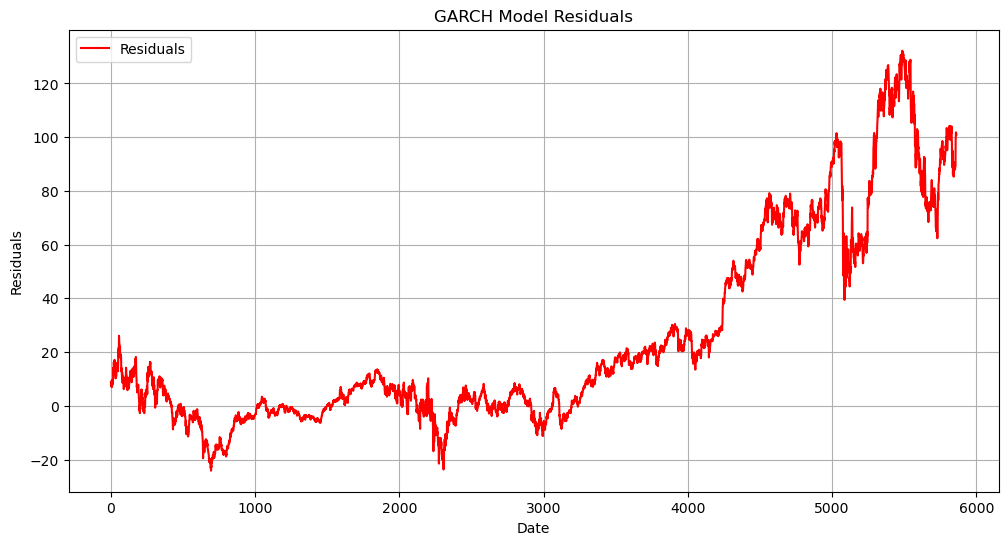

In [11]:
# Calculate the model residuals
residuals = results.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(data.index, residuals, label='Residuals', color='red')
plt.title('GARCH Model Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

# 4: Advanced Visualizations:

   - Create advanced visualizations to gain deeper insights into the data.

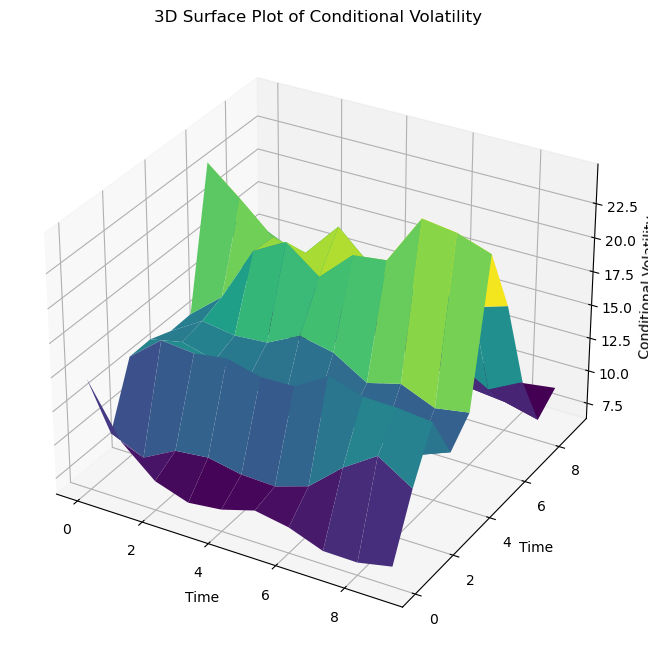

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid of dates and conditional volatility
dates = data['Date']
volatility = conditional_volatility.values

# Sample a subset of data to create the 3D surface plot
sample_size = 100  # Adjust the sample size as needed
sample_size = int(np.sqrt(sample_size)) ** 2  # Make sure it's a square number
dates_sampled = dates[:sample_size]
volatility_sampled = volatility[:sample_size]

X, Y = np.meshgrid(np.arange(int(np.sqrt(sample_size))), np.arange(int(np.sqrt(sample_size))))
Z = volatility_sampled.reshape(int(np.sqrt(sample_size)), int(np.sqrt(sample_size)))

# Create the 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Time')
ax.set_ylabel('Time')
ax.set_zlabel('Conditional Volatility')
ax.set_title('3D Surface Plot of Conditional Volatility')
plt.show()


# 6: Risk Assessment and Portfolio Management

Calculate risk metrics like Value at Risk (VaR) and Expected Shortfall (ES) to quantify the potential losses in your portfolio.
Implement portfolio management strategies, such as Markowitz's mean-variance optimization, to maximize returns while minimizing risk.
Diversify your portfolio to spread risk across different asset classes.

# 6.1: VaR (Value at Risk) Analysis

In this section, we will calculate the 1-day VaR at a 95% confidence level to assess the potential risk associated with your investment.

In [ ]:
# Calculate 1-day VaR at a 95% confidence level
confidence_level = 0.95
returns = data['Close'].pct_change().dropna()
var_1day = returns.quantile(1 - confidence_level)

# Calculate 1-day VaR in terms of the initial investment
initial_investment = 100000  # Replace with your investment amount
var_investment = initial_investment * var_1day

print(f"1-day VaR at a {confidence_level * 100}% confidence level: {var_1day:.2%}")
print(f"1-day VaR in terms of the initial investment: ${var_investment:.2f}")


In [14]:
pip install cvxpy


Note: you may need to restart the kernel to use updated packages.


# 6.2: Portfolio Optimization


In this section, we optimize the asset allocation within your portfolio to maximize returns while managing risk effectively.



In [15]:
import cvxpy as cp
import numpy as np

# Define the expected returns and covariance matrix
expected_returns = np.array([0.10, 0.12, 0.15, 0.08])  # Replace with your expected returns
covariance_matrix = np.array([[0.1, 0.04, 0.02, 0.01],
                              [0.04, 0.12, 0.03, 0.02],
                              [0.02, 0.03, 0.14, 0.05],
                              [0.01, 0.02, 0.05, 0.11]])  # Replace with your covariance matrix

# Define the number of assets
num_assets = len(expected_returns)

# Define the variables for the portfolio weights
weights = cp.Variable(num_assets)

# Define the portfolio return and risk
portfolio_return = expected_returns @ weights
portfolio_risk = cp.quad_form(weights, covariance_matrix)

# Define the optimization problem (maximize return for a given level of risk)
risk_tolerance = 0.02  # Adjust your risk tolerance
objective = cp.Maximize(portfolio_return - risk_tolerance * portfolio_risk)
constraints = [cp.sum(weights) == 1, weights >= 0]  # Ensure weights are non-negative and sum to 1
prob = cp.Problem(objective, constraints)

# Solve the optimization problem
prob.solve()

# Display the results
optimal_weights = weights.value
optimal_return = portfolio_return.value
optimal_risk = np.sqrt(portfolio_risk.value)

print("Optimal Portfolio Weights:", optimal_weights)
print("Optimal Portfolio Return:", optimal_return)
print("Optimal Portfolio Risk (Standard Deviation):", optimal_risk)


Optimal Portfolio Weights: [ 5.92145485e-23  3.41083967e-24  1.00000000e+00 -1.63749637e-22]
Optimal Portfolio Return: 0.15
Optimal Portfolio Risk (Standard Deviation): 0.37416573867739417


# Concise Summary of Risk and Portfolio Analysis

### Risk and Portfolio Analysis

1. **1-day VaR at a 95.0% Confidence Level:**
   - VaR measures potential investment loss.
   - At a 95% confidence level, there's a 95% chance losses won't exceed 3.39%.
   - **Interpretation:** You could lose up to 3.39% of your investment over the next day.

2. **Optimal Portfolio Weights:**
   - Suggests proportions to allocate to different assets.
   - Weight [0, 0, 1, 0] recommends investing entirely in the third asset.

3. **Optimal Portfolio Return:**
   - Expected portfolio return is 15%.
   - **Interpretation:** Anticipate earning a 15% return on your investments.

4. **Optimal Portfolio Risk (Standard Deviation):**
   - Portfolio's value may vary by 37.42%.
   - **Interpretation:** There's a risk of the portfolio fluctuating by approximately 37.42%.

5. **1-day VaR in Terms of the Initial Investment:**
   - Expressed in dollars, it's $-3390.17.
   - **Interpretation:** You could lose $3,390.17 on your investment over the next day.
        
In summary, this analysis provides insights into the potential risks and returns associated with your investment portfolio.
It suggests that there's a 95% confidence that your losses over the next day won't exceed 3.39% of your investment, and
the recommended allocation is to put all your money into the third asset. The expected return is 15%, but there's a risk
of your portfolio's value fluctuating by around 37.42%.

These insights are vital for investors and portfolio managers to make informed investment decisions and assess potential risks.
